In [1]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_conv
import plot_conv_sub

In [2]:
import ecco_v4_py as e4p
import xarray as xr

In [3]:
import cartopy.crs as ccrs
projection = ccrs.LambertConformal(central_longitude = -55)
cmap = 'Blues'
# import cmocean
# cmap = cmocean.cm.balance
import cartopy.feature as cfeature

In [4]:
import matplotlib.animation as animation

In [5]:
grid = xr.open_dataset('/efs_ecco/wjiang/data_folder/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
xx = np.array(grid.XC).ravel()
yy = np.array(grid.YC).ravel()

In [6]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/wjiang/emu_runs/trac_back/emu_trc_561_1_mask.boolspg8",
                            avg_type='m',
                            pfile_beg=0, pfile_end=1000000)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/wjiang/emu_runs/trac_back/emu_trc_561_1_mask.boolspg8

Reading /efs_ecco/wjiang/emu_runs/trac_back/emu_trc_561_1_mask.boolspg8

Reading Tracer Tool output ... 

Detected     19 files of ptracer_mon_mean.*.data
Detected     18 files of ptracer_mon_snap.*.data

Averaging type ("m" for monthly or "s" for snapshot): m

==> Reading and plotting monthly means ... 
Specified start and end files #: 0 and 1000000


Reading file ... /efs_ecco/wjiang/emu_runs/trac_back/emu_trc_561_1_mask.boolspg8/output/ptracer_mon_mean.0000000012.data

Reading file ... /efs_ecco/wjiang/emu_runs/trac_back/emu_trc_561_1_mask.boolspg8/output/ptracer_mon_mean.0000000719.data

Reading file ... /efs_ecco/wjiang/emu_runs/trac_back/emu_trc_561_1_mask.boolspg8/output/ptracer_mon_mean.0000001451.data

Reading file ... /efs_ecco/wjia

In [7]:
trc = e4p.llc_compact_to_tiles(globals_dict['return_vars']['trc'])

llc_compact_to_faces: dims, llc  (19, 50, 1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (19, 50, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorr

<Figure size 640x480 with 0 Axes>

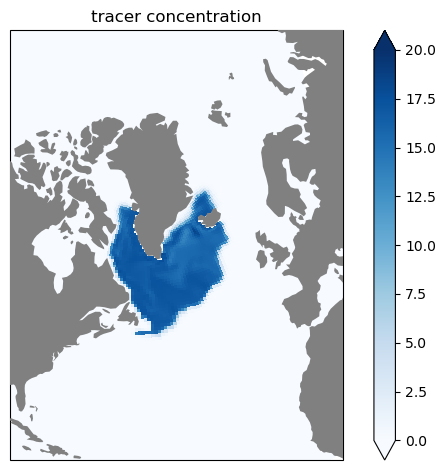

In [8]:
sens = trc.sum(axis = 1)

vmax = 20
plt.clf()
fig = plt.figure()
ax = plt.axes(projection = projection)
it = 18
pcm2 = plt.pcolormesh(grid.XC[2],grid.YC[2],sens[it,2],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
pcm3 = plt.pcolormesh(grid.XC[3],grid.YC[3],sens[it,3],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
pcm6 = plt.pcolormesh(grid.XC[6],grid.YC[6],sens[it,6],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
pcmx = plt.pcolormesh(grid.XC[10],grid.YC[10],sens[it,10],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
plt.title('tracer concentration')
# ax.tricontourf(xx,yy,varexp[2].ravel(),levels = 50,transform = ccrs.PlateCarree())
plt.colorbar(extend = 'both')
ax.set_extent((-80,-10,15,90))
ax.add_feature(cfeature.LAND,facecolor = 'grey',zorder = 10)
plt.tight_layout()

def update(frame):
    frame = 18-frame
    pcm2.set_array(sens[frame,2].ravel())
    pcm3.set_array(sens[frame,3].ravel())
    pcm6.set_array(sens[frame,6].ravel())
    pcmx.set_array(sens[frame,10].ravel())
    # ax.set_title(name+f' lag = {frame+1} week')
    return pcm2, pcm6, pcmx

ani = animation.FuncAnimation(
    fig, update, frames=19, blit=True, interval=100
)
plt.show()

ani.save('backward_trc.mp4')

In [9]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/wjiang/emu_runs/tracer_forward/emu_trc_561_926_mask.boolspg",
                            avg_type='m',
                            pfile_beg=0, pfile_end=1000000)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/wjiang/emu_runs/tracer_forward/emu_trc_561_926_mask.boolspg

Reading /efs_ecco/wjiang/emu_runs/tracer_forward/emu_trc_561_926_mask.boolspg

Reading Tracer Tool output ... 

Detected     13 files of ptracer_mon_mean.*.data
Detected     12 files of ptracer_mon_snap.*.data

Averaging type ("m" for monthly or "s" for snapshot): m

==> Reading and plotting monthly means ... 
Specified start and end files #: 0 and 1000000


Reading file ... /efs_ecco/wjiang/emu_runs/tracer_forward/emu_trc_561_926_mask.boolspg/output/ptracer_mon_mean.0000013908.data

Reading file ... /efs_ecco/wjiang/emu_runs/tracer_forward/emu_trc_561_926_mask.boolspg/output/ptracer_mon_mean.0000014640.data

Reading file ... /efs_ecco/wjiang/emu_runs/tracer_forward/emu_trc_561_926_mask.boolspg/output/ptracer_mon_mean.0000015372.data

R

In [10]:
trc = e4p.llc_compact_to_tiles(globals_dict['return_vars']['trc'])

llc_compact_to_faces: dims, llc  (13, 50, 1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 50, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


In [11]:
trc.shape

(13, 50, 13, 90, 90)

/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorr

<Figure size 640x480 with 0 Axes>

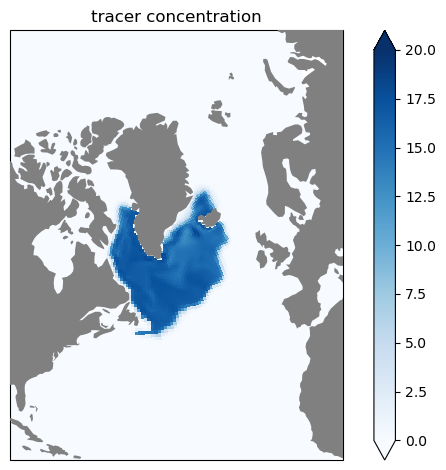

In [ ]:
sens = trc.sum(axis = 1)

vmax = 20
plt.clf()
fig = plt.figure()
ax = plt.axes(projection = projection)
it = 0
pcm2 = plt.pcolormesh(grid.XC[2],grid.YC[2],sens[it,2],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
pcm3 = plt.pcolormesh(grid.XC[3],grid.YC[3],sens[it,3],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
pcm6 = plt.pcolormesh(grid.XC[6],grid.YC[6],sens[it,6],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
pcmx = plt.pcolormesh(grid.XC[10],grid.YC[10],sens[it,10],transform = ccrs.PlateCarree(),vmax = vmax,vmin = 0,cmap = cmap)
plt.title('tracer concentration')
# ax.tricontourf(xx,yy,varexp[2].ravel(),levels = 50,transform = ccrs.PlateCarree())
plt.colorbar(extend = 'both')
ax.set_extent((-80,-10,15,90))
ax.add_feature(cfeature.LAND,facecolor = 'grey',zorder = 10)
plt.tight_layout()

def update(frame):
    # frame = 18-frame
    pcm2.set_array(sens[frame,2].ravel())
    pcm3.set_array(sens[frame,3].ravel())
    pcm6.set_array(sens[frame,6].ravel())
    pcmx.set_array(sens[frame,10].ravel())
    # ax.set_title(name+f' lag = {frame+1} week')
    return pcm2, pcm6, pcmx

ani = animation.FuncAnimation(
    fig, update, frames=13, blit=True, interval=100
)
plt.show()

ani.save('forward_trc.mp4')